# PCA (Principal Component Analysis)
Technique of ML for Dimentionality Reduction and Data Visualization
<h3>Why PCA?</h3>
- Reducing High-Dimensionaly data
- Remove Noise and Redundancy
- Speed Up ML Model and reduce overfitting
- Visualize high-dimensional data in 2D and 3D
<h3>How PCA Works?</h3>
- <h4>Standardize The Data</h4>
    - Mean = 0 , std = 1
    - use StandardScaler in sklearn
- <h4>Compute the Covariance Matrix</h4>
    - Shows how fetaures vary with respect to each other.
- <h4>Compute eigenvalues and eigenvectors</h4>
    - Eigenvectors :- Directions (Principal Components)
    - Eigenvalues  :- Magnitude (imporatance / variance Capture)
- <h4>Sort Eigenvectors by decreasing eigenvalues</h4>
    - Choose top <b>k</b> components based on how much variance you want to retain (eg.,95%).
- <h4>Project the data onto new subspace</h4>
    - Multiply Original Data with selected eigenvectors to get new features.

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
X = data.data
y = data.target

In [4]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [7]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
scaler = StandardScaler()

In [13]:
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [30]:
pca = PCA(n_components = 2) # Reduce to 2 Components

In [31]:
X_pca = pca.fit_transform(X_scaled)

In [32]:
X_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

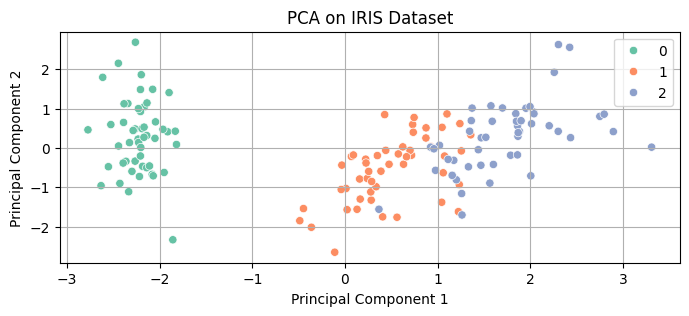

In [33]:
plt.figure(figsize=(8,3))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on IRIS Dataset')
plt.grid(True)
plt.show()

In [39]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_)*100)

[0.72962445 0.22850762]
95.81320720000164


# You see [0.72962445 0.22850762], that means the first two components capture 95% of the data variance

<h3>One More Example</h3>

In [40]:
import numpy as np
from sklearn.datasets import make_classification

In [75]:
X,y = make_classification(
    n_samples = 1000,
    n_features = 3,
    n_informative = 3,
    n_redundant = 0,
    n_classes = 3,
    n_clusters_per_class = 1
)

In [76]:
X.shape

(1000, 3)

In [77]:
X

array([[-2.10330844e+00,  1.84825264e-01, -3.88516499e+00],
       [ 8.14523595e-02, -4.46452443e+00, -1.02001198e+00],
       [-8.36473634e-01, -7.72064227e-02, -4.97641529e-01],
       ...,
       [ 2.00901957e+00, -9.46651637e-02,  3.47229205e-01],
       [-8.18144888e-01, -2.84039465e-01, -1.47516688e+00],
       [-1.29123807e+00, -1.64449458e-03, -1.11106415e+00]])

In [78]:
y.shape

(1000,)

In [79]:
y[:50]

array([0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1,
       0, 1, 1, 1, 1, 0])

In [80]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
X_scaled

array([[-1.31580653, -0.13028719, -2.66789008],
       [ 0.35596247, -3.60518363, -0.4961739 ],
       [-0.34643032, -0.32612812, -0.10022983],
       ...,
       [ 1.8309281 , -0.33917668,  0.54016161],
       [-0.33240524, -0.48071391, -0.84117022],
       [-0.69441399, -0.26965358, -0.56518923]])

In [82]:
# Apply PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [83]:
X_pca.shape

(1000, 2)

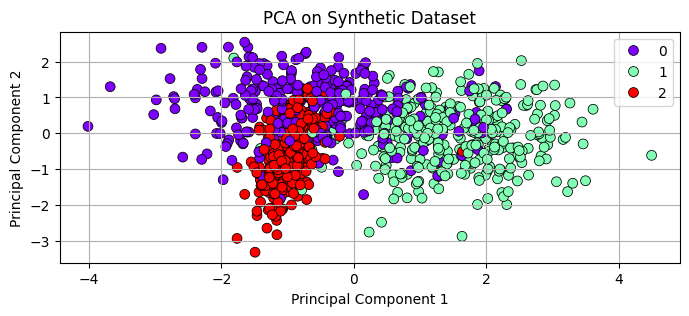

In [84]:
# Creating A Plot on PCA
plt.figure(figsize=(8,3))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,palette='rainbow',edgecolor='k',s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Synthetic Dataset')
plt.grid(True)
plt.show()

In [85]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_)*100)

[0.62672872 0.30464925]
93.13779750859008


# You see [0.62672872 0.30464925], that means the first two components capture 93% of the data variance